In [31]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer # tool to substitute values in dataframes
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt   # --> same effect of line above

In [2]:
df = pd.read_csv('/Users/giacomovecchiato/Desktop/covid_data.csv')

In [3]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-01-11,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-01-12,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-01-13,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-01-14,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
df1 = df.iloc[:,[0,1,2,3,4,7]]

In [6]:
df1.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases',
       'total_deaths'],
      dtype='object')

In [7]:
df1['total_vaccinations'] = df['total_vaccinations']

/var/folders/qq/bgp7w8md6tj4x6jf87c248lw0000gn/T/ipykernel_18725/1790941257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_vaccinations'] = df['total_vaccinations']


In [8]:
df1.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases',
       'total_deaths', 'total_vaccinations'],
      dtype='object')

In [9]:
df1.head()

,iso_code,continent,location,date,total_cases,total_deaths,total_vaccinations
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN


In [10]:
df1.drop(['iso_code'],axis=1,inplace=True) # inplace to actually remove column from df

/var/folders/qq/bgp7w8md6tj4x6jf87c248lw0000gn/T/ipykernel_18725/13915029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['iso_code'],axis=1,inplace=True) # inplace to actually remove column from df


In [11]:
df1.head()

,continent,location,date,total_cases,total_deaths,total_vaccinations
0,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN
1,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN
2,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN
3,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN
4,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN


In [12]:
df1.rename(columns={'total_cases':'cases','total_deaths':'deaths','total_vaccinations':'vaccinations'},inplace=True)

/var/folders/qq/bgp7w8md6tj4x6jf87c248lw0000gn/T/ipykernel_18725/2558586517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'total_cases':'cases','total_deaths':'deaths','total_vaccinations':'vaccinations'},inplace=True)


In [13]:
df1.head()

,continent,location,date,cases,deaths,vaccinations
0,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN
1,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN
2,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN
3,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN
4,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN


In [14]:
df1['date'] = pd.to_datetime(df['date']) # to convert in date format (it should already be the case)

/var/folders/qq/bgp7w8md6tj4x6jf87c248lw0000gn/T/ipykernel_18725/2147172479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = pd.to_datetime(df['date']) # to convert in date format (it should already be the case)


In [15]:
df1.head()

,continent,location,date,cases,deaths,vaccinations
0,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN
1,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN
2,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN
3,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN
4,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN


In [16]:
df1.describe() # already gives a description of the dataframe

,cases,deaths,vaccinations
count,4.118040e+05,4.118040e+05,8.541700e+04
mean,7.365292e+06,8.125957e+04,5.616980e+08
std,4.477582e+07,4.411901e+05,1.842160e+09
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.280750e+03,4.300000e+01,1.970788e+06
50%,6.365300e+04,7.990000e+02,1.439435e+07
75%,7.582720e+05,9.574000e+03,1.161972e+08
max,7.758668e+08,7.057132e+06,1.357877e+10


In [17]:
df1.info() # give information on the quality of the data in the dataframe (e.g. you deduce how many NaN)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   continent     402910 non-null  object        
 1   location      429435 non-null  object        
 2   date          429435 non-null  datetime64[ns]
 3   cases         411804 non-null  float64       
 4   deaths        411804 non-null  float64       
 5   vaccinations  85417 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 19.7+ MB


In [18]:
df1['vaccinations'] = df1['vaccinations'].fillna(0) # fill NA values of 'vaccinations' with zeroes (maybe not the smartest move)

/var/folders/qq/bgp7w8md6tj4x6jf87c248lw0000gn/T/ipykernel_18725/3139878207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['vaccinations'] = df1['vaccinations'].fillna(0) # fill NA values of 'vaccinations' with zeroes (maybe not the smartest move)


In [19]:
df1.fillna('NA',inplace=True) # fill all other NaN values with 'NA' string

/var/folders/qq/bgp7w8md6tj4x6jf87c248lw0000gn/T/ipykernel_18725/2501422466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.fillna('NA',inplace=True) # fill all other NaN values with 'NA' string


In [20]:
df1.info() # as you can see, all the values have been filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   continent     429435 non-null  object        
 1   location      429435 non-null  object        
 2   date          429435 non-null  datetime64[ns]
 3   cases         429435 non-null  object        
 4   deaths        429435 non-null  object        
 5   vaccinations  429435 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 19.7+ MB


In [21]:
df1.head()

,continent,location,date,cases,deaths,vaccinations
0,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0
1,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0
2,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0
3,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0
4,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0


In [22]:
print(df1.dtypes) # need to convert dataypes of columns

continent               object
location                object
date            datetime64[ns]
cases                   object
deaths                  object
vaccinations           float64
dtype: object


In [23]:
df1['cases'] = pd.to_numeric(df1['cases'], errors='coerce')
df1['deaths'] = pd.to_numeric(df1['deaths'], errors='coerce')

/var/folders/qq/bgp7w8md6tj4x6jf87c248lw0000gn/T/ipykernel_18725/1627000512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cases'] = pd.to_numeric(df1['cases'], errors='coerce')
/var/folders/qq/bgp7w8md6tj4x6jf87c248lw0000gn/T/ipykernel_18725/1627000512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['deaths'] = pd.to_numeric(df1['deaths'], errors='coerce')


In [24]:
print(df1.dtypes)

continent               object
location                object
date            datetime64[ns]
cases                  float64
deaths                 float64
vaccinations           float64
dtype: object


In [25]:
df2 = df1.groupby('location')[['location','cases','deaths','vaccinations']].sum().reset_index()

/var/folders/qq/bgp7w8md6tj4x6jf87c248lw0000gn/T/ipykernel_18725/3746270074.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df1.groupby('location')[['location','cases','deaths','vaccinations']].sum().reset_index()


In [26]:
df2.head()

,location,cases,deaths,vaccinations
0,Afghanistan,2.459890e+08,9482547.0,1.682112e+09
1,Africa,1.461689e+10,306955815.0,5.277700e+11
2,Albania,3.556351e+08,4320183.0,3.953643e+08
3,Algeria,3.214307e+08,8409268.0,2.983973e+08
4,American Samoa,6.894077e+06,28209.0,0.000000e+00


In [27]:
df3 = df1.groupby(['location','date'])[['location','date','cases','deaths','vaccinations']].sum().reset_index()

/var/folders/qq/bgp7w8md6tj4x6jf87c248lw0000gn/T/ipykernel_18725/3910046916.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3 = df1.groupby(['location','date'])[['location','date','cases','deaths','vaccinations']].sum().reset_index()


In [28]:
df3

,location,date,cases,deaths,vaccinations
0,Afghanistan,2020-01-05,0.0,0.0,0.0
1,Afghanistan,2020-01-06,0.0,0.0,0.0
2,Afghanistan,2020-01-07,0.0,0.0,0.0
3,Afghanistan,2020-01-08,0.0,0.0,0.0
4,Afghanistan,2020-01-09,0.0,0.0,0.0
...,...,...,...,...,...
421660,Zimbabwe,2024-07-31,266386.0,5740.0,0.0
421661,Zimbabwe,2024-08-01,266386.0,5740.0,0.0
421662,Zimbabwe,2024-08-02,266386.0,5740.0,0.0
421663,Zimbabwe,2024-08-03,266386.0,5740.0,0.0


In [29]:
df4 = df3[df3['cases']>100]

In [30]:
df4

,location,date,cases,deaths,vaccinations
91,Afghanistan,2020-04-05,274.0,5.0,0.0
92,Afghanistan,2020-04-06,274.0,5.0,0.0
93,Afghanistan,2020-04-07,274.0,5.0,0.0
94,Afghanistan,2020-04-08,274.0,5.0,0.0
95,Afghanistan,2020-04-09,274.0,5.0,0.0
...,...,...,...,...,...
421660,Zimbabwe,2024-07-31,266386.0,5740.0,0.0
421661,Zimbabwe,2024-08-01,266386.0,5740.0,0.0
421662,Zimbabwe,2024-08-02,266386.0,5740.0,0.0
421663,Zimbabwe,2024-08-03,266386.0,5740.0,0.0


## Plotting example

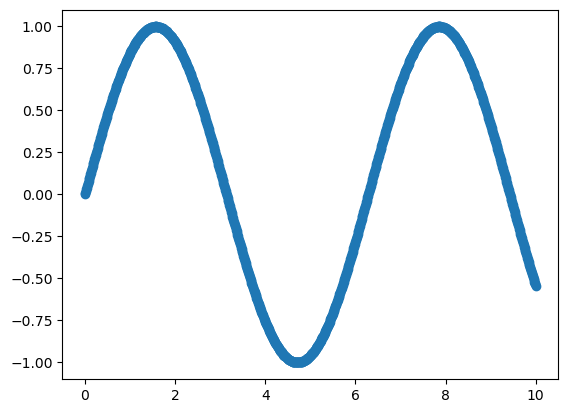

In [37]:
# Example
x = np.linspace(0,10,1000)
y = np.sin(x)
plt.plot(x,y)

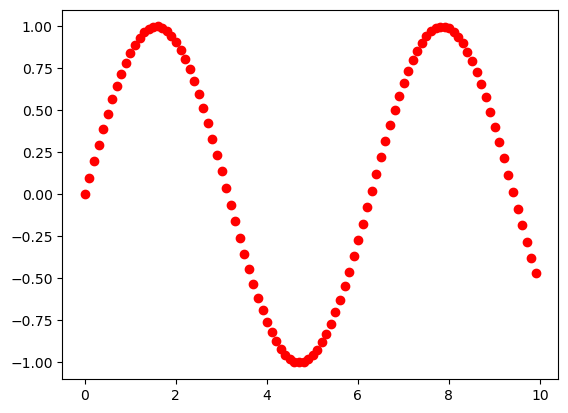

In [38]:
plt.scatter(x[::10],y[::10],color='red') # just scatter plot. But you can get same result with normal plot

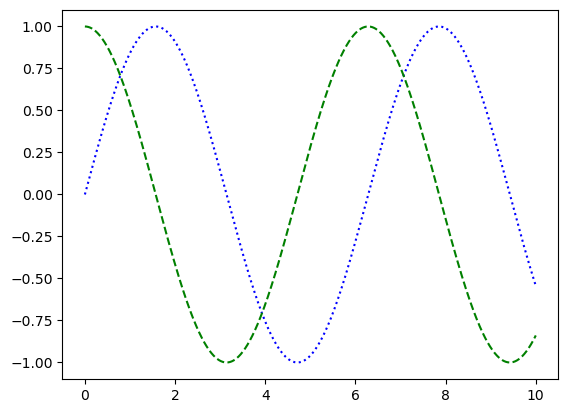

In [48]:
plt.plot(x,y,':b')
plt.plot(x,np.cos(x),'--g')